<a href="https://colab.research.google.com/github/asif79941/projects/blob/main/apple_stock_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/Apple Dataset.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10954 non-null  object 
 1   Open       10954 non-null  float64
 2   High       10954 non-null  float64
 3   Low        10954 non-null  float64
 4   Close      10954 non-null  float64
 5   Adj Close  10954 non-null  float64
 6   Volume     10954 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 599.2+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
mean,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
std,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
50%,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
75%,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


In [ ]:
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


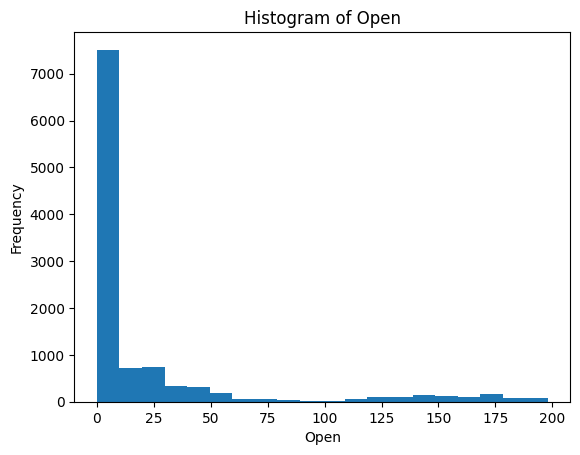

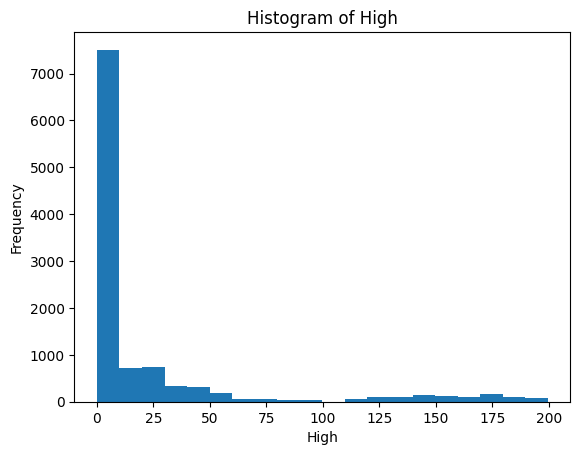

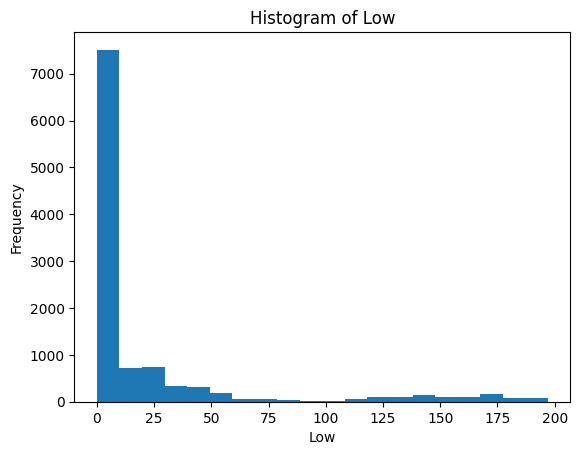

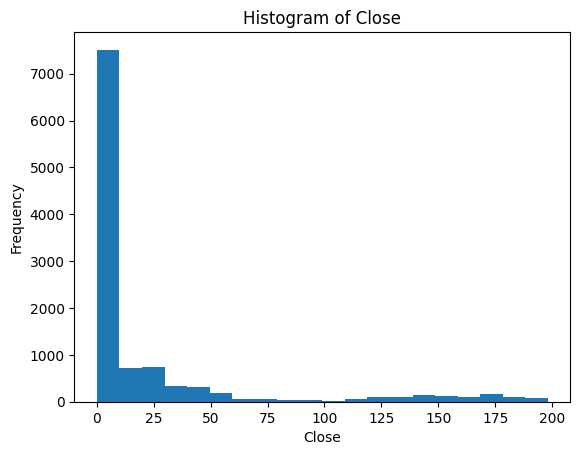

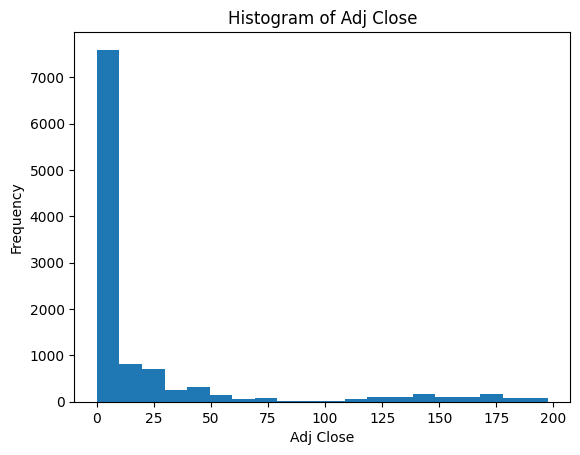

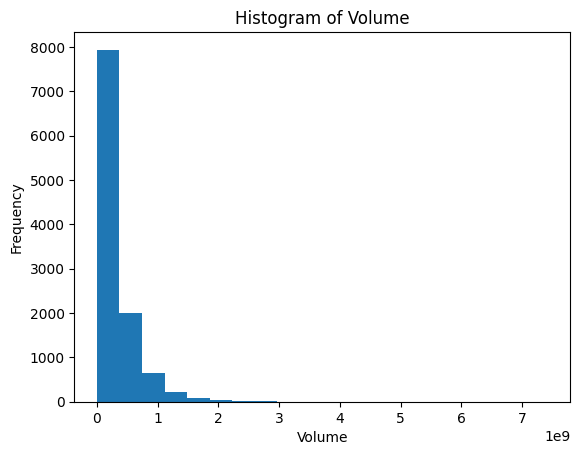

In [ ]:
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
for column in columns_to_plot:
    plt.figure()
    plt.hist(data[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

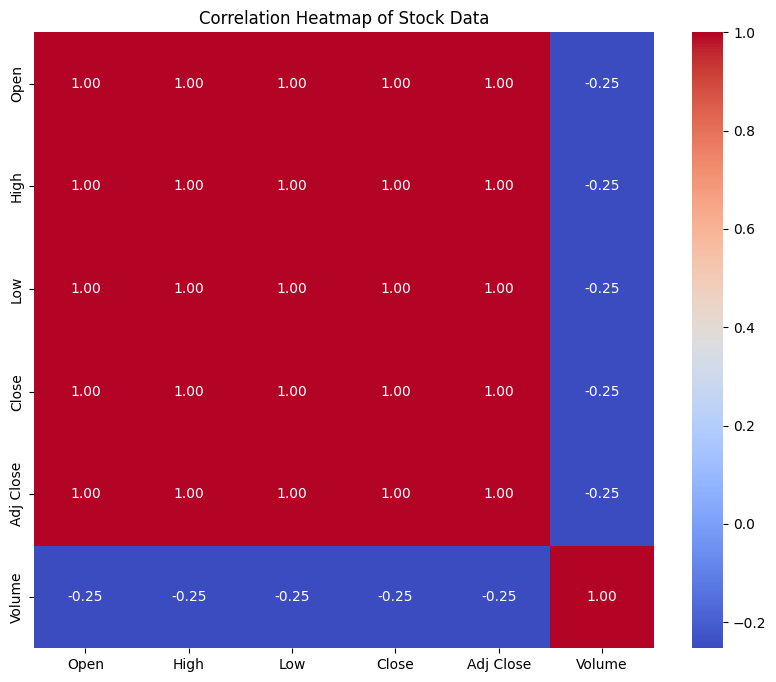

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Stock Data')
plt.show()

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


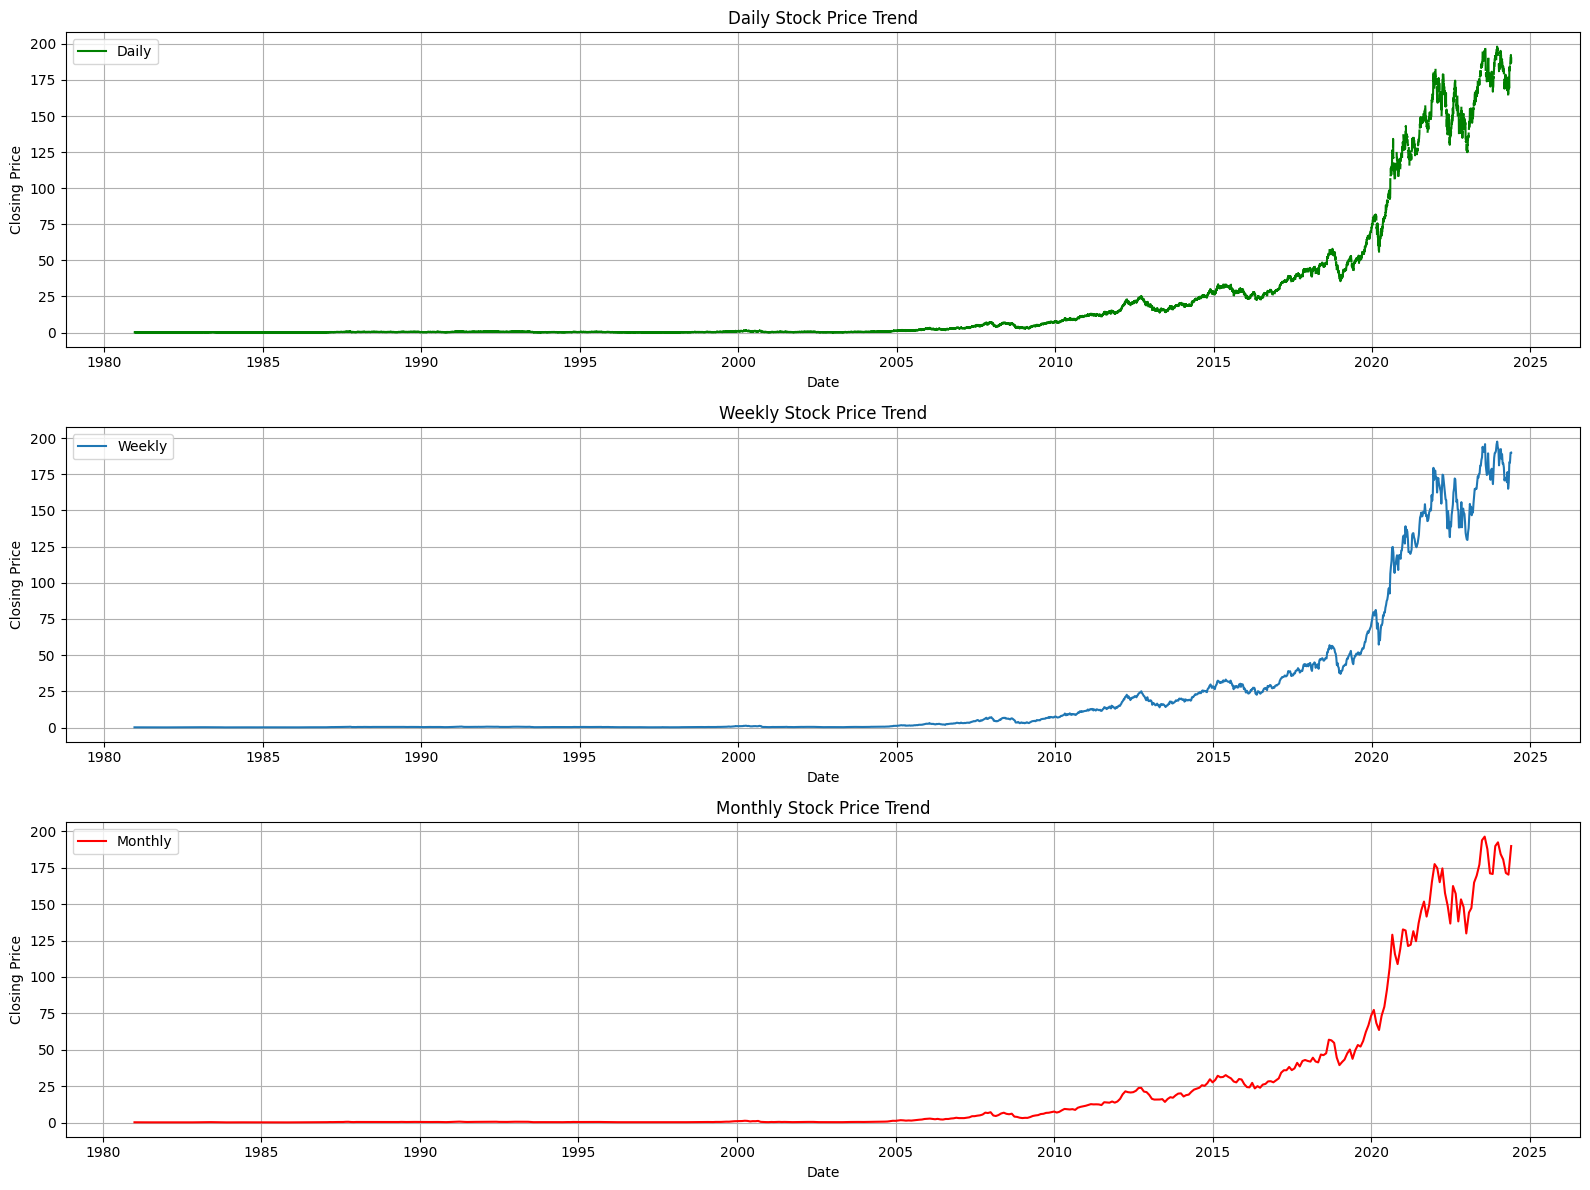

In [ ]:

daily_data = data['Close'].resample('D').last()
weekly_data = data['Close'].resample('W').last()
monthly_data = data['Close'].resample('M').last()

fig, axes = plt.subplots(3, 1, figsize=(16, 12))
axes[0].plot(daily_data, label='Daily',color="green")
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Closing Price')
axes[0].set_title('Daily Stock Price Trend')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(weekly_data, label='Weekly')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Closing Price')
axes[1].set_title('Weekly Stock Price Trend')
axes[1].legend()
axes[1].grid(True)

axes[2].plot(monthly_data, label='Monthly',color="red")
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Closing Price')
axes[2].set_title('Monthly Stock Price Trend')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()
